# Analog to Digital Conversion

The Raspberry Pi computer does not have a way to read analog inputs. It's a digital-only computer. Analog inputs are handy because many sensors are analog outputs, so we need a way to read that inputs. For that we are going to use an analog-to-digital converter, in our case the chip MCP3008.

An *analog-to-digital converter* (ADC, A/D, or A to D) is a device that converts a continuous physical quantity (usually voltage) to a digital number that represents the quantity's amplitude. Typically the digital output will be a two's complement binary number that is proportional to the input.

# The MCP3008 SPI ADC chip

The MCP3008 chip is an SPI-based analogue to digital converter (ADC). It has 8 analog input channels that can be configured, so it can handle up to 8 ADC conversions. The MCP3008 is a 10-bit ADC so its output will vary from 0 to 1023. The pinout of the MCP3008 is the following:

<center>
    <figure align="center">
        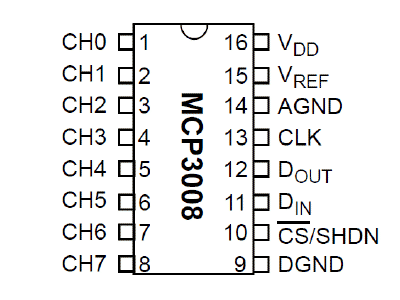
        <figcaption>
            MCP3008 SDI ADC Pinout — <a href="https://learn.adafruit.com/assets/30456">Tony DiCola [CC BY 3.0]</a>
        </figcaption>
    </figure>
</center>

Typically the VDD pin is connected to  3.3V power. The AGND and DGND pins can be connected directly to the ground reference point. The VREF pin is the reference voltage which is the largest possible voltage that the ADC can interpret. In our scenario we will connect the VREF pin to 3.3V (same as VDD). So if 3.3V was sampled on any of the ADC's channels it would be interpreted as the maximum digital value that can be represented by this 10-bit ADC i.e. $2^{10} – 1 = 1023$. Similarly the smallest analog voltage that the ADC can detect (also known as the 'LSB size') is VREF/1024. Which in our case is $\frac{3.3\text{V}}{1024}= 3.22\text{mV}$ and represents a digital value of 1. The equation that converts between the analog voltage and its digital interpretation is given by "Digital output code = 1024*VIN/VREF"; where VIN is the analog input voltage and VREF is the reference voltage.

# SPI
The Serial Peripheral Interface (SPI) is a communication bus that is used to interface one or more slave peripheral integrated circuits (ICs) to a single master SPI device; usually a microcontroller or microprocessor of some sort. Many SPI  Peripheral ICs exist. They include, analog to digital converters (ADC), digital to analog converters (DAC), general purpose input/output (GPIO) expansion ICs, temperature sensing ICs, accelerometers and many more. 

The 3 SPI wires shared by all devices on the SPI  bus are:

* Master in slave out (DIN). Data is moved from slave to master on this wire. 
* Master out slave in (DOUT). Data is moved from master to slave on this wire.

Serial clock (CLK). This clock is always generated by the master controller and is used to synchronize the transmission of data between devices on the bus.
In addition to these wires we have ‘n’ wires for ‘n’ slave devices on the bus. Each one of these wires carries the chip select signal (CS) for its respective device. Only one slave device can have its chip select signal asserted by the master controller at a time.

The operation of the SPI bus is conceptually simple. Both the master controller and each slave device contain a shift register. When the chip select signal of a slave device is asserted (usually by being pulled low), the DIN and DOUT wires are used to connect its shift register with that of the master device. Clock pulses are then generated (by the master device)  to shift data between the two shift registers enabling communication. In this sense the read and write operation are combined.

# ADC using SPI from a Raspberry Pi
In order to read analog data we need to use the following pins: VDD (power), DGND (digital ground) to power the MCP3008 chip. We also need four 'SPI' data pins: DOUT (Data Out from MCP3008), CLK (Clock pin), DIN (Data In from Raspberry Pi),  and CS (Chip Select).  Finally of course, a source of analog data, we'll be using the basic 10k trim pot. A trimpot is a three-terminal resistor with a sliding or rotating contact that forms an adjustable voltage divider:

<center>
    <figure align="center">
        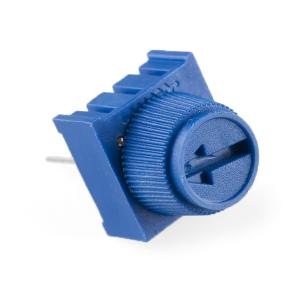
        <figcaption>
            10k Ohm Trimpot
        </figcaption>
    </figure>
</center>

The MCP3008 has a few more pins we need to connect: AGND (analog ground, used sometimes in precision circuitry, which this is not) connects to GND, and VREF (analog voltage reference, used for changing the 'scale' - we want the full scale so tie it to 3.3V)

The connections of the MCP3008 chip is the following:

MCP 3008 Pin | RPi Pin
-------------|---------
VDD  | 3.3V (red)
VREF | 3.3V (red)
AGND | GND (black)
CLK  | SCLK (orange)
DOUT | MISO (yellow)
DIN  | MOSI (blue)
CS   | CE0 (purple)
DGND | GND (black)

Below is a wiring diagram:

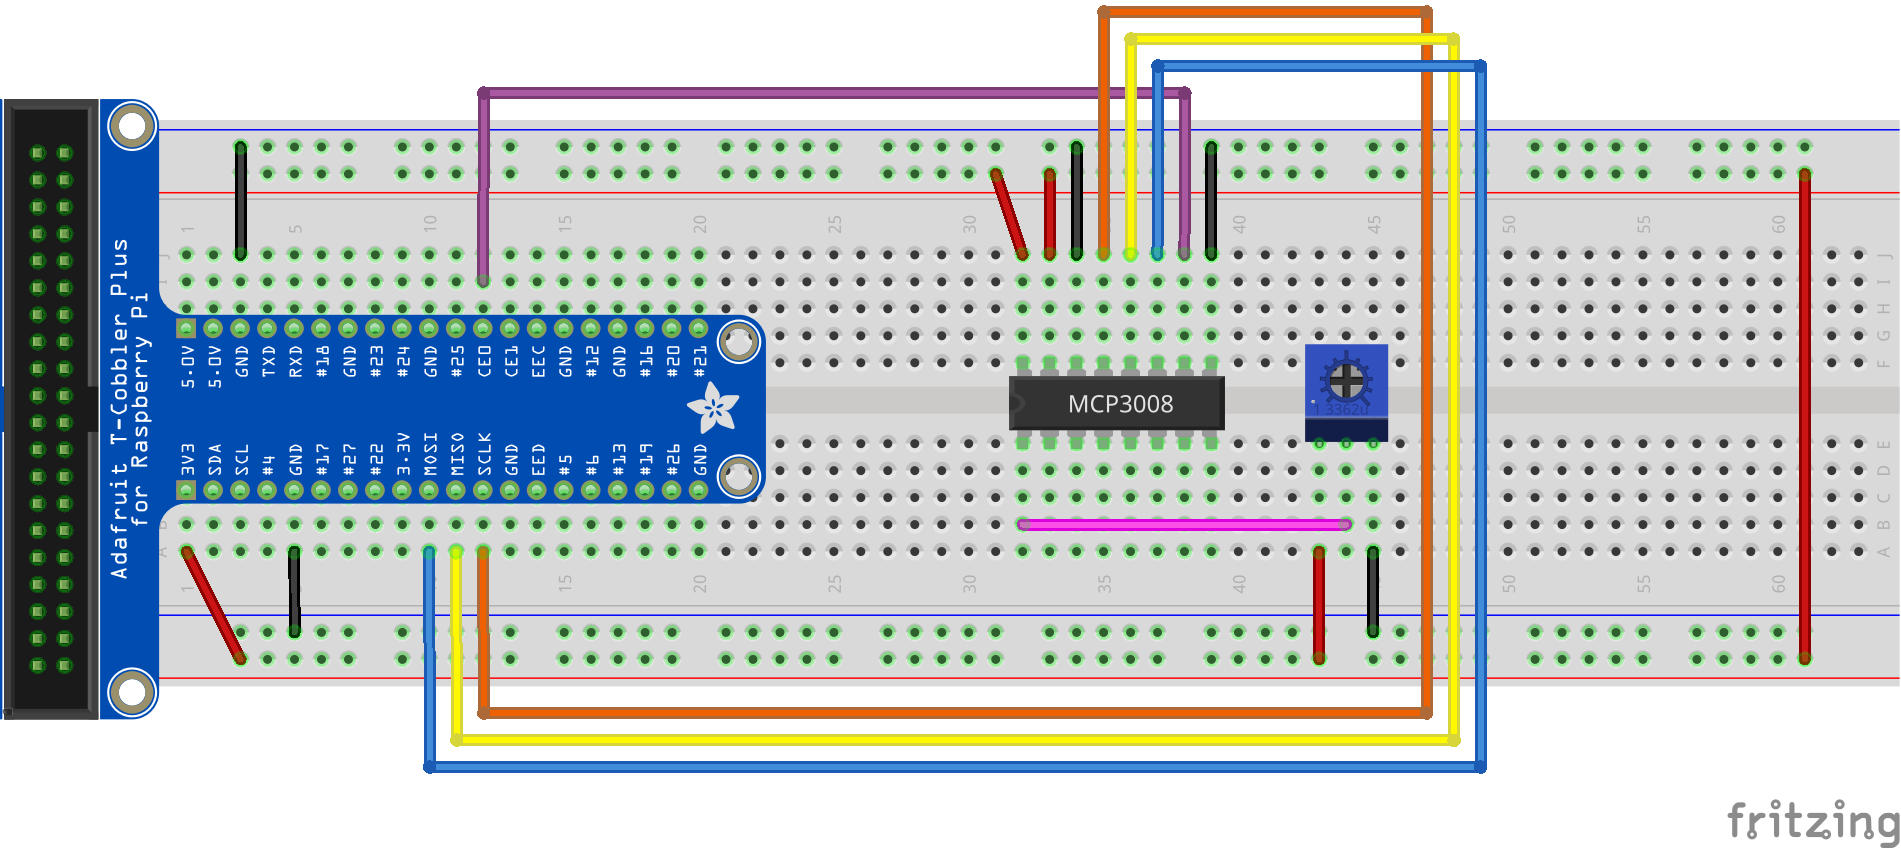

Next, connect up the potentiometer. Pin #3 (left) connects to 3.3V (red), #2 (middle) connects to MCP3008 CH0 (analog input #0) with a wire, and #1 (right) goes to GND (black).

The GPIO Zero library includes an `MCP3008` class, which allows us to easily read the output from the MCP3008 chip. This will be especially helpful for reading the value of the potentiometer.

The following Python program reads the potentiometer value and prints it to the screen:

In [ ]:
# Import all the necessary libraries
from gpiozero import MCP3008
import time

# Create an instance for MCP3008 and read from channel 0
potentiometer = MCP3008(channel=0)

try:
    while True:
        value = potentiometer.value
        print("Reading ({:0.2%})".format(value))
        time.sleep(1)
        
except KeyboardInterrupt:
    potentiometer.close()

## Exercise
Add another potentiometer to the circuit and extend the above program to print both values.

In [ ]:
# Your code here